In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.shape

(53940, 10)

In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Mock Exam
<hr>  

## Untuk latihan kali ini, gunakan dataset diamonds dari seaborn.

1. Untuk feature/column price, hitung dan beri penjelasan (insight) terkait:  
* Titik Pusat Data (Central Tendency)
* Persebaran Data (Dispersion)
* Distribusi Data (Distribution)


In [6]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Central tendency: mean, median, modus
Sebaran data: variance dan standard deviasi
distribusi data: normal/tidak, skewness dan kurtosis

2. Carilah data outlier dan beri penjelasan (insight) pada feature/column carat!   
Tambahkan plot
untuk menampilkan adanya data outlier!


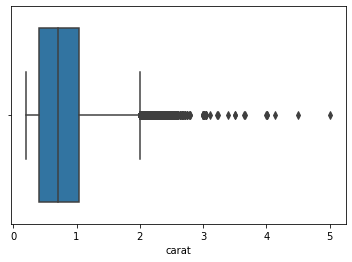

In [4]:
sns.boxplot(x='carat',data=df)

In [8]:
def pencilan(x):
    iqr=x.describe().loc['75%']-x.describe().loc['25%']

    low_lim = x.describe().loc['25%']-1.5*iqr 
    up_lim = x.describe().loc['75%']+1.5*iqr
    # print('Batas bawah', low_lim)
    # print('Batas atas', up_lim)

    outlier =[] 
    for i in x: 
        if (i> up_lim) or (i<low_lim): 
            outlier.append(i)

    return outlier

len(pencilan(df['carat']))

1889

3. Tampilkan perkembangan rata-rata harga berlian (price) berdasarkan carat menggunakan plot yang tepat!   
Jelaskan (insight) harga berlian dari plot yang Anda buat!

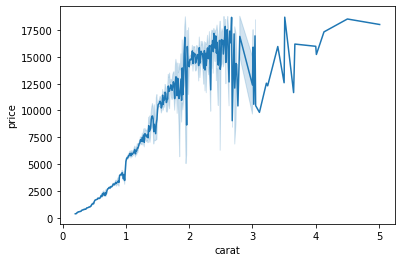

In [10]:
sns.lineplot(x='carat',y='price', data=df)

4. Tampilkan rata-rata harga berlian (price) berdasarkan jenis potongan (cut) menggunakan plot yang tepat!   
Jelaskan (insight) harga berlian dari plot yang Anda buat!

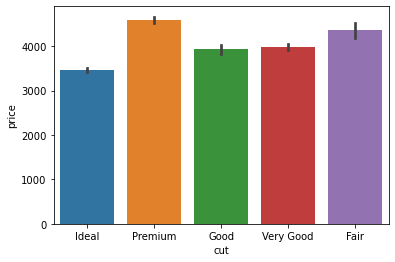

In [11]:
sns.barplot(x='cut',y='price',data=df)

5. Feature/kolom mana yang memiliki korelasi tertinggi dengan feature/kolom price.  
Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan berlian setelah mengetahui nilai korelasi tersebut?


In [13]:
df.corr(method='spearman')['price']

carat    0.962883
depth    0.010020
table    0.171784
price    1.000000
x        0.963196
y        0.962719
z        0.957232
Name: price, dtype: float64